# HR Analytics: Job Change of Data Science

**Features**

- enrollee_id : Unique ID for candidate
- city: City code
- city_ development _index : Developement index of the city (scaled)
- gender: Gender of candidate
- relevent_experience: Relevant experience of candidate
- enrolled_university: Type of University course enrolled if any
- education_level: Education level of candidate
- major_discipline :Education major discipline of candidate
- experience: Candidate total experience in years
- company_size: No of employees in current employer's company
- company_type : Type of current employer
- lastnewjob: Difference in years between previous job and current job
- training_hours: training hours completed
- target: 0 – Not looking for job change, 1 – Looking for a job change


**Task**

- Predict the probability of a candidate will work for the company
- Interpret model(s) such a way that illustrate which features affect candidate decision
- HR Analytics

# Importing Tools and Data

In [143]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, roc_auc_score, f1_score, log_loss, matthews_corrcoef, log_loss

In [2]:
data_info = pd.read_excel('Feature Definition.xlsx', header=1, index_col='Feature')

def feat_info(col_name):
    print(data_info.loc[col_name]['Definition'])

In [3]:
train = pd.read_csv('aug_train.csv')
test = pd.read_csv('aug_test.csv')

# Data Overview

In [4]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [5]:
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [7]:
train.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


In [8]:
listItem = []

for col in train.columns:
    listItem.append([col, train[col].dtype, train[col].isna().sum(), round((train[col].isna().sum())/len(train[col])*100), 
                    train[col].nunique(), list(train[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct%', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct%,unique,uniqueSample
0,enrollee_id,int64,0,0,19158,"[25830, 21131]"
1,city,object,0,0,123,"[city_107, city_30]"
2,city_development_index,float64,0,0,93,"[0.83, 0.512]"
3,gender,object,4508,24,3,"[Female, nan]"
4,relevent_experience,object,0,0,2,"[Has relevent experience, No relevent experience]"
5,enrolled_university,object,386,2,3,"[Part time course, nan]"
6,education_level,object,460,2,5,"[Phd, Primary School]"
7,major_discipline,object,2813,15,6,"[Other, Business Degree]"
8,experience,object,65,0,22,"[1, 20]"
9,company_size,object,5938,31,8,"[nan, 50-99]"


Now that we know about percentage of null values each feature, let's get over it and then let's make encoding of the categorical feature so we can visualize the data and determine wheter the feature is useful for modelling or not.

# Preprocessing Data

In [9]:
# let's drop the values which the percetage of null values below
train.dropna(subset=['enrolled_university', 'education_level', 'last_new_job', 'experience'], inplace=True)

In [10]:
train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    3863
relevent_experience          0
enrolled_university          0
education_level              0
major_discipline          2222
experience                   0
company_size              5310
company_type              5476
last_new_job                 0
training_hours               0
target                       0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  object 
 2   city_development_index  18014 non-null  float64
 3   gender                  14151 non-null  object 
 4   relevent_experience     18014 non-null  object 
 5   enrolled_university     18014 non-null  object 
 6   education_level         18014 non-null  object 
 7   major_discipline        15792 non-null  object 
 8   experience              18014 non-null  object 
 9   company_size            12704 non-null  object 
 10  company_type            12538 non-null  object 
 11  last_new_job            18014 non-null  object 
 12  training_hours          18014 non-null  int64  
 13  target                  18014 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

Let's focus on determining whether change the gender, relevant_experience, major_dicipline, company_size, and company_type value or drop its null values.

In [12]:
feat_info('gender')
feat_info('relevant_experience')
feat_info('major_dicipline')
feat_info('company_size')
feat_info('company_type')

Gender of candidate
Relevant experience of candidate
Education major dicipline of candidate
No of employees in current employer's company
Type of current employer


We know that except company size, we cannot fill the null value because we know we have to put a concrete essence for the value of those feature. So now we make change the null value with others

In [13]:
train['gender'].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [14]:
train['major_discipline'].unique()

array(['STEM', nan, 'Arts', 'Humanities', 'Business Degree', 'No Major',
       'Other'], dtype=object)

In [15]:
train['company_type'].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

From the information above we can change the null values into "Other", so that we not assuming null value with misunderstanding. Let's change the null values of those feature into "Other".

In [16]:
train[['gender', 'major_discipline', 'company_type']] = train[['gender', 'major_discipline', 'company_type']].fillna('Other')
print(train['gender'].unique())
print(train['major_discipline'].unique())
print(train['company_type'].unique())

['Male' 'Other' 'Female']
['STEM' 'Other' 'Arts' 'Humanities' 'Business Degree' 'No Major']
['Other' 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Public Sector'
 'NGO']


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18014 non-null  int64  
 1   city                    18014 non-null  object 
 2   city_development_index  18014 non-null  float64
 3   gender                  18014 non-null  object 
 4   relevent_experience     18014 non-null  object 
 5   enrolled_university     18014 non-null  object 
 6   education_level         18014 non-null  object 
 7   major_discipline        18014 non-null  object 
 8   experience              18014 non-null  object 
 9   company_size            12704 non-null  object 
 10  company_type            18014 non-null  object 
 11  last_new_job            18014 non-null  object 
 12  training_hours          18014 non-null  int64  
 13  target                  18014 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# Explanatory Data Analysist

In [18]:
train = train.drop('enrollee_id', axis=1)

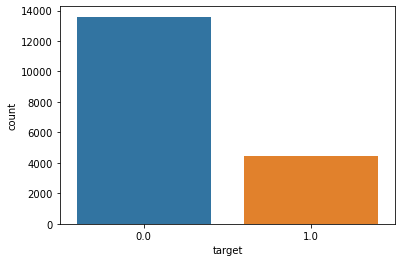

In [19]:
sns.countplot(train['target'])

Looks like we got an imbalance target. Later we should choose wether we balance it or not.

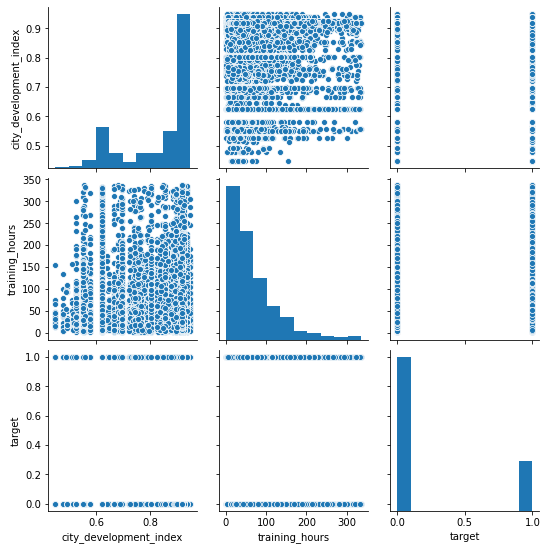

In [20]:
sns.pairplot(train)

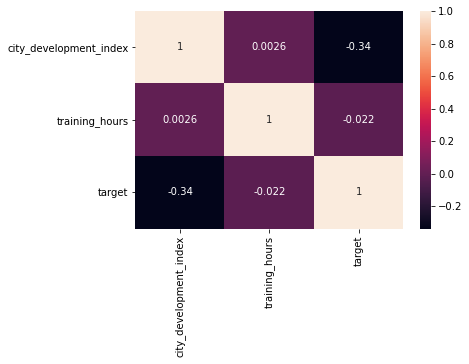

In [21]:
sns.heatmap(train.corr(), annot=True)

From graphic above we could tell that there are insignificant correlation between city development index and training hours to the target. Let's take a look the distribution of each city development index and training hours to the target

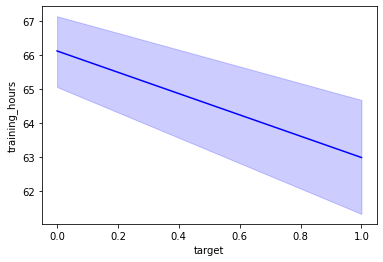

In [22]:
sns.lineplot(x='target', y='training_hours', data=train, color='blue')

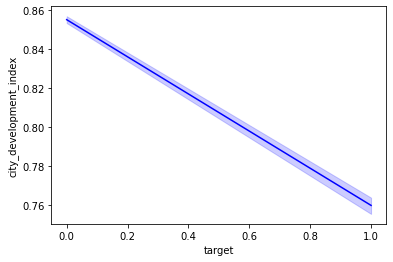

In [23]:
sns.lineplot(x='target', y='city_development_index', data=train, color='blue')

It seems that both of the feature has the same pattern which is if value is getting smaller then they tend to looking for job change.

Now let's find out whether if they had more education level they tend to change the job or not and how many of them has a relevant experience. Hereby we want to know that the habbit of someone with relevant experience to change their job. From that point we could know that Data Science is a preferable job or not to those who already had experience with relevant job.

In [24]:
train.select_dtypes(include='object').keys()

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

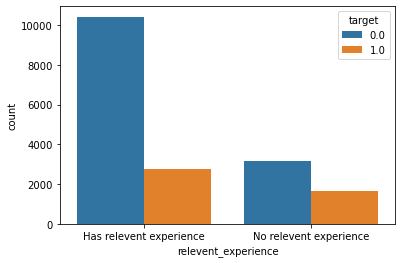

In [25]:
sns.countplot(train['relevent_experience'], hue=train['target'])
# bikin secara persentasinya

In [26]:
train[train['relevent_experience']=='No relevent experience']['target'].value_counts()[1]/len(train[train['relevent_experience']=='No relevent experience']['target'])

0.34183250414593697

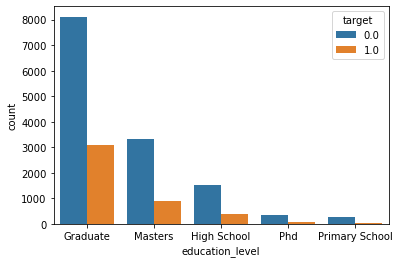

In [27]:
sns.countplot(train['education_level'], hue=train['target'])

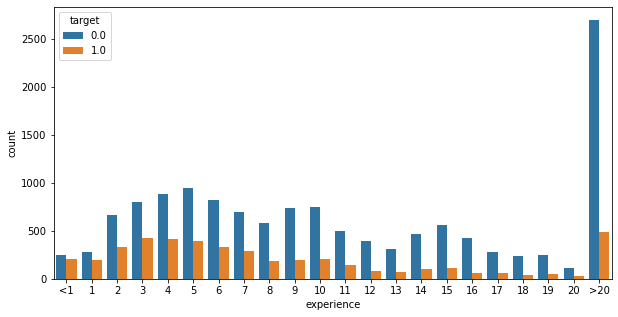

In [28]:
order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']

plt.figure(figsize=(10,5))
sns.countplot(train['experience'], hue=train['target'], order=order)

We can conclude that people who tend to change job has no relevent experience with education equal to graduate and most of them likely has experience to work at least 4 years.

# Training Data

We still have null values on company size. Let's fill it with KNN imputer. Let's take a look at the feature.

In [29]:
feat_info('company_size')

No of employees in current employer's company


In [30]:
train['company_size'].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

Looks like the data itself is clustered situation. Let's fill the null value with KNN model.

In [31]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18014 non-null  object 
 1   city_development_index  18014 non-null  float64
 2   gender                  18014 non-null  object 
 3   relevent_experience     18014 non-null  object 
 4   enrolled_university     18014 non-null  object 
 5   education_level         18014 non-null  object 
 6   major_discipline        18014 non-null  object 
 7   experience              18014 non-null  object 
 8   company_size            12704 non-null  object 
 9   company_type            18014 non-null  object 
 10  last_new_job            18014 non-null  object 
 11  training_hours          18014 non-null  int64  
 12  target                  18014 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.5+ MB


In [33]:
obj = train.select_dtypes(include='object').astype('category')
flt = train.select_dtypes(exclude='object').reset_index()

In [34]:
cat = obj.apply(lambda x: x.cat.codes)

In [35]:
imputer.fit(cat)

KNNImputer()

In [36]:
cat_trans = imputer.transform(cat)

In [37]:
fix = pd.DataFrame(cat_trans, columns=obj.columns)

In [38]:
fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18014 entries, 0 to 18013
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 18014 non-null  float64
 1   gender               18014 non-null  float64
 2   relevent_experience  18014 non-null  float64
 3   enrolled_university  18014 non-null  float64
 4   education_level      18014 non-null  float64
 5   major_discipline     18014 non-null  float64
 6   experience           18014 non-null  float64
 7   company_size         18014 non-null  float64
 8   company_type         18014 non-null  float64
 9   last_new_job         18014 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


In [39]:
df = pd.concat([fix,flt], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18014 entries, 0 to 18013
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    18014 non-null  float64
 1   gender                  18014 non-null  float64
 2   relevent_experience     18014 non-null  float64
 3   enrolled_university     18014 non-null  float64
 4   education_level         18014 non-null  float64
 5   major_discipline        18014 non-null  float64
 6   experience              18014 non-null  float64
 7   company_size            18014 non-null  float64
 8   company_type            18014 non-null  float64
 9   last_new_job            18014 non-null  float64
 10  index                   18014 non-null  int64  
 11  city_development_index  18014 non-null  float64
 12  training_hours          18014 non-null  int64  
 13  target                  18014 non-null  float64
dtypes: float64(12), int64(2)
memory usage:

In [40]:
X = df.drop('target', axis=1)
y = df['target']

In [41]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

# Creating Model

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
def lg_predict(X_train, y_train):
    # calling the model
    model = LogisticRegression()
    
    # fit the data
    model.fit(X_train, y_train)
    
    # predicting the target
    predict = model.predict(X_test)
    
    # making confusion matrix and classification report
    print('Logistic Regression Report')
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))

def svc_predict(X_train, y_train):
    # calling the model
    model = SVC()
    
    # fit the data
    model.fit(X_train, y_train)
    
    # predicting the target
    predict = model.predict(X_test)
    
    # making confusion matrix and classification report
    print('SVC Report')
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    
def knn_predict(X_train, y_train):
    # calling the model
    model = KNeighborsClassifier()
    
    # fit the data
    model.fit(X_train, y_train)
    
    # predicting the target
    predict = model.predict(X_test)
    
    # making confusion matrix and classification report
    print('KNN Report')
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    
def rfc_predict(X_train, y_train):
    # calling the model
    model = RandomForestClassifier()
    
    # fit the data
    model.fit(X_train, y_train)
    
    # predicting the target
    predict = model.predict(X_test)
    
    # making confusion matrix and classification report
    print('Random Forest Report')
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))

In [44]:
lst = [lg_predict, svc_predict, knn_predict, rfc_predict]

for i in lst:
    print
    i(X_train, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Report
              precision    recall  f1-score   support

         0.0       0.77      0.98      0.86      4081
         1.0       0.59      0.08      0.14      1324

    accuracy                           0.76      5405
   macro avg       0.68      0.53      0.50      5405
weighted avg       0.72      0.76      0.68      5405

[[4010   71]
 [1221  103]]
SVC Report
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      4081
         1.0       0.00      0.00      0.00      1324

    accuracy                           0.76      5405
   macro avg       0.38      0.50      0.43      5405
weighted avg       0.57      0.76      0.65      5405

[[4081    0]
 [1324    0]]


C:\Users\asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Report
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82      4081
         1.0       0.28      0.13      0.18      1324

    accuracy                           0.71      5405
   macro avg       0.52      0.51      0.50      5405
weighted avg       0.64      0.71      0.66      5405

[[3643  438]
 [1155  169]]
Random Forest Report
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      4081
         1.0       0.58      0.48      0.52      1324

    accuracy                           0.79      5405
   macro avg       0.71      0.68      0.69      5405
weighted avg       0.78      0.79      0.78      5405

[[3620  461]
 [ 694  630]]


From evaluation metrics above we can see that random forest has a better result than the others so we continue tuning the paramater of random forest in search for a better result.

# Hyperparameter Tuning

In [45]:
params_rf = [{
    'n_estimators' : [1, 5, 10, 50, 100,500, 1000],
    'max_features' : ['auto', 'sqrt'],
    'max_depth' : [2, 4, 6, 8, 10],
    'min_samples_split' : [2,5],
    'min_samples_leaf' : [1,2],
    'bootstrap' : [True, False]
}]

In [46]:
cv = GridSearchCV(RandomForestClassifier(), param_grid=params_rf, cv=3, verbose=True, n_jobs=-1)

In [47]:
cv_tuned = cv.fit(X_train, y_train)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  8.6min finished


In [54]:
cv_tuned.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [48]:
predict = cv_tuned.predict(X_test)
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      4081
         1.0       0.58      0.53      0.55      1324

    accuracy                           0.79      5405
   macro avg       0.71      0.70      0.71      5405
weighted avg       0.78      0.79      0.79      5405

[[3570  511]
 [ 626  698]]


# Boosting Evaluation Metrics

In [49]:
# try using auc roc and display its visualization
# evaluate it using kfold
# gudluck

In [61]:
from sklearn.model_selection import KFold
K = 100
kf =KFold(n_splits = K, shuffle = True, random_state = 42)

In [62]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average ='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average ='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

def visualize_error()

In [63]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(X, y):
    
    #split data
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, RandomForestClassifier(
        bootstrap=True, max_depth=10, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators=100))
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [172]:
lst = []
for i, tr_err, val_err in zip(range(1,100,1), train_errors, validation_errors):
    error = tr_err['roc']-val_err['roc']
    lst.append(error)
lst = pd.DataFrame(lst)
best_iteration_score = lst.reset_index().rename(columns={'index':'iteration', 0:'error_score'}).sort_values(by='error_score')
best_iteration_score.iloc[0]

iteration      65.00000
error_score     0.00577
Name: 65, dtype: float64

In [173]:
print('Best iteration is at {} and the error score is {}'.format(best_iteration_score['iteration'].iloc[0],
                                                                 best_iteration_score['error_score'].iloc[0]))

Best iteration is at 65 and the error score is 0.005770042208740556


In [174]:
best_iteration_score.iloc[-1]

iteration      89.000000
error_score     0.186043
Name: 89, dtype: float64

Now that we know about the best iteration and the minimun error, let's find out the classification report according to the 65th iteration.

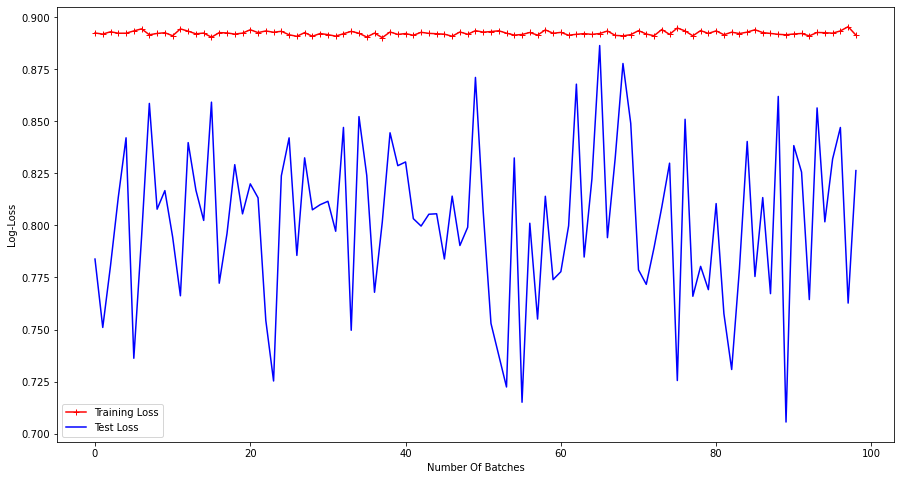

In [166]:
train_error, test_error = [], []
for i, tr_err, val_err in zip(range(1,100,1), train_errors, validation_errors):
    train_error.append(tr_err['roc'])
    test_error.append(val_err['roc'])
    
plt.figure(figsize = (15,8))
plt.plot(train_error, 'r-+', label = 'Training Loss')
plt.plot(test_error, 'b-', label = 'Test Loss')
plt.xlabel('Number Of Batches')
plt.ylabel('Log-Loss')
plt.legend(loc = 'best')

plt.show()

In [161]:
# funtion to plot learning curves

def plot_learning_curve(model, X, Y):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)
    train_loss, test_loss = [], []
    
    for m in range(200,len(x_train),200):
        
        model.fit(x_train.iloc[:m,:], y_train[:m])
        y_train_prob_pred = model.predict_proba(x_train.iloc[:m,:])
        train_loss.append(log_loss(y_train[:m], y_train_prob_pred))
        
        y_test_prob_pred = model.predict_proba(x_test)
        test_loss.append(log_loss(y_test, y_test_prob_pred))
        
    plt.figure(figsize = (15,8))
    plt.plot(train_loss, 'r-+', label = 'Training Loss')
    plt.plot(test_loss, 'b-', label = 'Test Loss')
    plt.xlabel('Number Of Batches')
    plt.ylabel('Log-Loss')
    plt.legend(loc = 'best')



    plt.show()
        

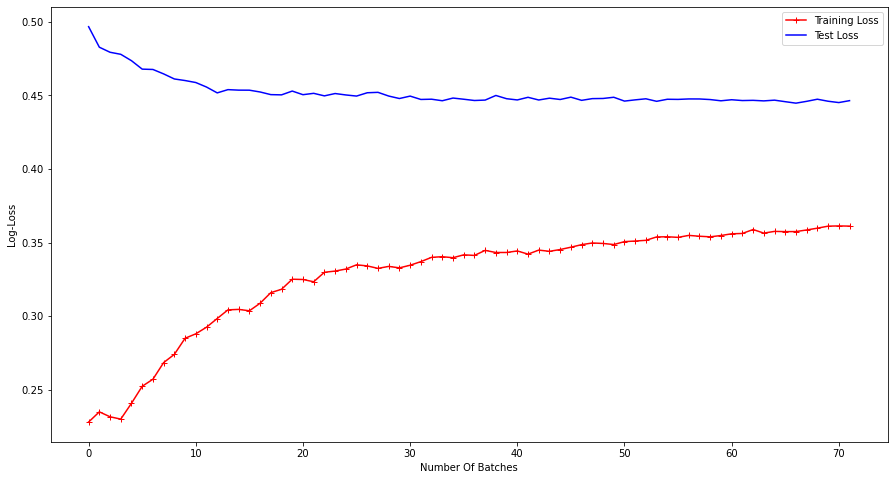

In [162]:
plot_learning_curve(RandomForestClassifier(
        bootstrap=True, max_depth=10, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators=100),
                    X, y)

Now that we know the gap between the train and test gap of loss. But we can still boost it cause we know that target has an imbalance data so perhaps we can find better evaluation if we make it balance using SMOTE.

In [167]:
from imblearn.over_sampling import SMOTE

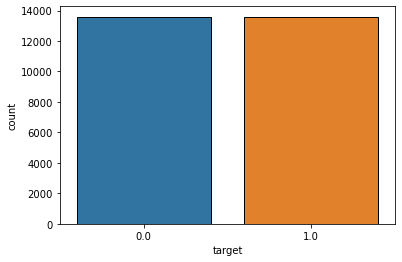

In [169]:
smote = SMOTE(random_state = 402)
X_smote, Y_smote = smote.fit_resample(X,y)


sns.countplot(Y_smote, edgecolor = 'black')

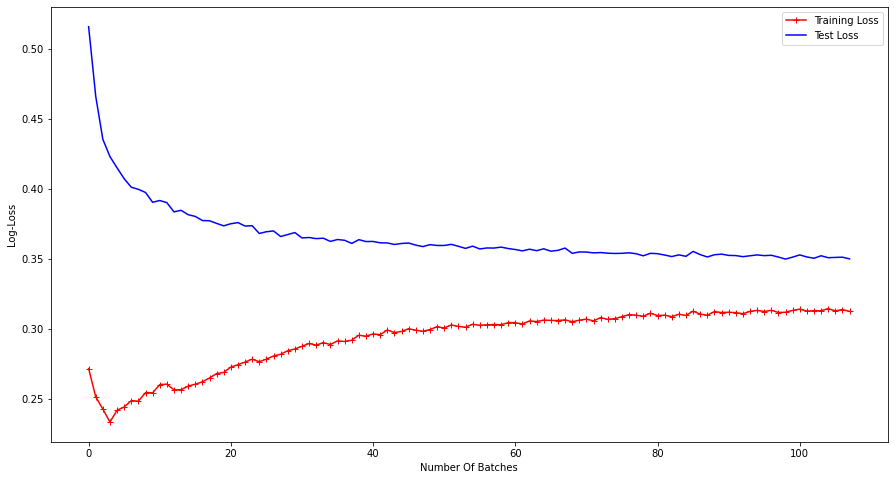

In [171]:
plot_learning_curve(RandomForestClassifier(
        bootstrap=True, max_depth=10, max_features='auto', min_samples_leaf=2, min_samples_split=5, n_estimators=100),
                    X_smote, Y_smote)